In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [90]:
et = pd.read_csv("Ethereum.csv")

In [91]:
et.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 31, 2024","2,331.15","2,343.11","2,350.80","2,328.19",393.18K,-0.51%
1,"Jan 30, 2024","2,343.11","2,317.79","2,389.23","2,298.85",387.12K,1.09%
2,"Jan 29, 2024","2,317.79","2,256.92","2,320.97","2,237.69",318.84K,2.70%
3,"Jan 28, 2024","2,256.92","2,267.91","2,306.43","2,240.14",216.93K,-0.48%
4,"Jan 27, 2024","2,267.91","2,267.56","2,282.16","2,252.31",151.26K,0.02%


In [92]:
et.nunique()

Date        2884
Price       2769
Open        2761
High        2764
Low         2756
Vol.        2336
Change %    1377
dtype: int64

In [93]:
et.duplicated().sum()

0

In [94]:
et['Date'] = pd.to_datetime(et['Date'])

In [95]:
et = et.sort_values(by='Date',ascending=True)

In [96]:
et.head()

,Date,Price,Open,High,Low,Vol.,Change %
2883,2016-03-10,11.75,11.20,11.85,11.07,0.00K,4.91%
2882,2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%
2881,2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%
2880,2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%
2879,2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05%


In [97]:
et.map(lambda x: '-' in str(x)).any()

Date         True
Price       False
Open        False
High        False
Low         False
Vol.         True
Change %     True
dtype: bool

In [98]:
(et['Change %'] == '-').sum()

0

In [99]:
print(et['Vol.'] == '-')

2883    False
2882    False
2881    False
2880    False
2879    False
        ...  
4       False
3       False
2       False
1       False
0       False
Name: Vol., Length: 2884, dtype: bool


In [100]:
et = et.reset_index()

In [101]:
et = et.drop('index',axis=1)

In [102]:
et.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2016-03-10,11.75,11.20,11.85,11.07,0.00K,4.91%
1,2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%
2,2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%
3,2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%
4,2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05%


In [103]:
et.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2884 non-null   datetime64[ns]
 1   Price     2884 non-null   object        
 2   Open      2884 non-null   object        
 3   High      2884 non-null   object        
 4   Low       2884 non-null   object        
 5   Vol.      2884 non-null   object        
 6   Change %  2884 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 157.8+ KB


In [104]:
def process(i):
  try:
    n = float(i[:-1])
    if i.endswith("K"):
      return n*1000
    elif i.endswith("M"):
      return n*1000000
    elif i.endswith("B"):
      return n*1000000000
  except ValueError:
    return np.nan

In [105]:
et["Vol."] = et["Vol."].apply(process)

In [106]:
(et['Vol.'] == np.nan).sum()

0

In [107]:
def convert(price):
    if "," in price:
        price = price.replace(",","")
    return float(price)

In [108]:
et["Price"] = et["Price"].apply(convert)

In [109]:
et["Open"] = et["Open"].apply(convert)

In [110]:
et["High"] = et["High"].apply(convert)

In [111]:
et["Low"] = et["Low"].apply(convert)

In [112]:
et.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2884 non-null   datetime64[ns]
 1   Price     2884 non-null   float64       
 2   Open      2884 non-null   float64       
 3   High      2884 non-null   float64       
 4   Low       2884 non-null   float64       
 5   Vol.      2876 non-null   float64       
 6   Change %  2884 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 157.8+ KB


In [113]:
et["Change %"] = et["Change %"].str.replace("%","").apply(convert)

In [114]:
et.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2884 non-null   datetime64[ns]
 1   Price     2884 non-null   float64       
 2   Open      2884 non-null   float64       
 3   High      2884 non-null   float64       
 4   Low       2884 non-null   float64       
 5   Vol.      2876 non-null   float64       
 6   Change %  2884 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 157.8 KB


In [115]:
et.corr()

,Date,Price,Open,High,Low,Vol.,Change %
Date,1.000000,0.706842,0.706737,0.703199,0.712450,0.059075,-0.029552
Price,0.706842,1.000000,0.998151,0.999088,0.999036,0.078919,-0.005294
Open,0.706737,0.998151,1.000000,0.999293,0.998506,0.078267,-0.042411
High,0.703199,0.999088,0.999293,1.000000,0.998271,0.079115,-0.024340
Low,0.712450,0.999036,0.998506,0.998271,1.000000,0.079001,-0.019901
Vol.,0.059075,0.078919,0.078267,0.079115,0.079001,1.000000,0.001655
Change %,-0.029552,-0.005294,-0.042411,-0.024340,-0.019901,0.001655,1.000000


In [116]:
et.drop(["Date","Vol.","Change %"],axis=1,inplace=True)

In [117]:
X = et[["Open","High","Low"]]

In [118]:
y = et[["Price"]]

In [119]:
class MinMaxScale:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, X):
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)

    def transform(self, X):
        return (X - self.min) / (self.max - self.min)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [120]:
mm = MinMaxScaler()
mmx = mm.fit_transform(X)
mmy = mm.fit_transform(y)


Mean Squared Error: 579.2081708421551
R^2 Score: 0.9994989724216345


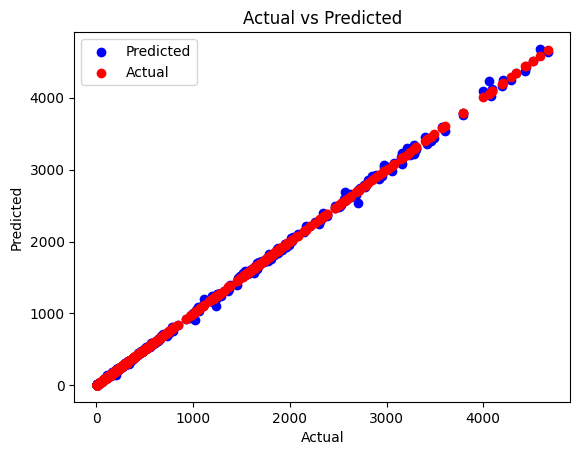

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse_sklearn = mean_squared_error(y_test, y_pred)
r2_sklearn = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_sklearn)
print("R^2 Score:", r2_sklearn)

plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()


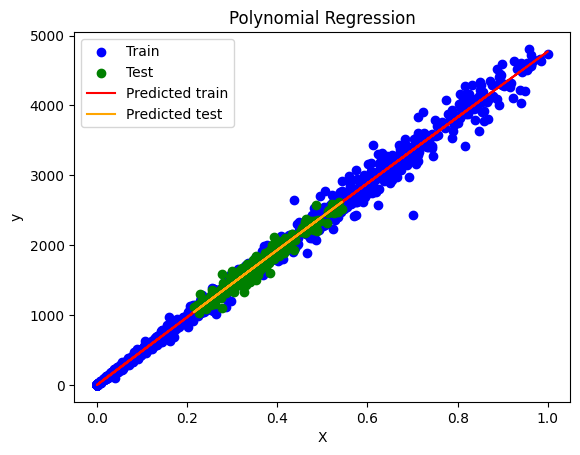

In [122]:
class PolynomialRegress:
    def __init__(self, degree):
        self.degree = degree
        self.theta = None
    def lin_alg_inv(self,X):
        if len(X.shape) != 1 or X.shape[0] != X.shape[1]:
            raise ValueError("Matrix must be square.")

        n = X.shape[0]
        augmented_matrix = np.concatenate((X, np.eye(n)), axis=1)

        for col in range(n - 1):
            pivot = augmented_matrix[col, col]
            if abs(pivot) < 1e-10:
                return None
            for row in range(col + 1, n):
                factor = augmented_matrix[row, col] / pivot
                augmented_matrix[row, col:] = augmented_matrix[row, col:] - factor * augmented_matrix[col, :]

        for col in range(n - 1, 0, -1):
            for row in range(col):
             factor = augmented_matrix[row, col]
             augmented_matrix[row, col:] = augmented_matrix[row, col:] - factor * augmented_matrix[col, :]

        return augmented_matrix[:,n:n+n]

    def fit(self, X, y):
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        X_poly = np.column_stack([np.ones(len(X_poly)), X_poly])

        self.theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    def predict(self, X):
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        X_poly = np.column_stack([np.ones(len(X_poly)), X_poly])

        return X_poly.dot(self.theta)

    def evaluate(self, y_true, y_pred):
        mse = np.mean((y_true - y_pred)**2)
        return mse

    def r2_score(self,y_true, y_pred):
        y_mean = np.mean(y_true)

        ss_total = np.sum((y_true - y_mean) ** 2)

        ss_residual = np.sum((y_true - y_pred) ** 2)

        r2 = 1 - (ss_residual / ss_total)

        return r2

def train_test_split(X, y, test_size=None, random_state=None):

    indices = np.arange(len(X))

    if test_size is None:
        test_size = 0.2
    elif isinstance(test_size, float):
        if test_size < 0 or test_size > 1:
            raise ValueError("test_size should be between 0.0 and 1.0")
        elif test_size == 0.0:
            return X, None, y, None
        elif test_size == 1.0:
            return None, X, None, y
        else:
            split_index = int(len(X) * (1 - test_size))
    elif isinstance(test_size, int):
        if test_size <= 0 or test_size >= len(X):
            raise ValueError("test_size should be a positive integer smaller than the number of samples")
        else:
            split_index = len(X) - test_size
    else:
        raise ValueError("test_size should be float, int or None")

    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

    return X_train, X_test, y_train, y_test

X = et[["Open","High","Low"]]
y = et[["Price"]]


X_train, X_test, y_train, y_test = train_test_split(np.array(X.values), np.array(y.values), test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

degree = 2
poly_reg = PolynomialRegress(degree)
poly_reg.fit(X_train_scaled[:, 0], y_train)

y_pred_train = poly_reg.predict(X_train_scaled[:, 0])
y_pred_test = poly_reg.predict(X_test_scaled[:, 0])

plt.scatter(X_train_scaled[:, 0], y_train, color='blue', label='Train')
plt.scatter(X_test_scaled[:, 0], y_test, color='green', label='Test')
plt.plot(X_train_scaled[:, 0], y_pred_train, color='red', label='Predicted train')
plt.plot(X_test_scaled[:, 0], y_pred_test, color='orange', label='Predicted test')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()


In [123]:
mse_custom = poly_reg.evaluate(np.array(y.values), poly_reg.predict(np.array(X.values)[:, 0]))
mse_custom

1.7653617060907254e+17

In [124]:
r2_train = poly_reg.r2_score(y_train, y_pred_train)
r2_custom = poly_reg.r2_score(y_test, y_pred_test)

print("R-squared score for training set:", r2_train)
print("R-squared score for testing set:", r2_custom)

R-squared score for training set: 0.99636919802831
R-squared score for testing set: 0.9714269870445003


In [125]:
results = {
    'Model': ['Polynomial Regression (Custom)', 'Polynomial Regression (Sklearn)'],
    'Mean Squared Error (MSE)': [mse_custom, mse_sklearn],
    'R-squared (R2) Score': [r2_custom, r2_sklearn]
}

results_df = pd.DataFrame(results)

results_df

,Model,Mean Squared Error (MSE),R-squared (R2) Score
0,Polynomial Regression (Custom),1.765362e+17,0.971427
1,Polynomial Regression (Sklearn),5.792082e+02,0.999499


# POLYNOMIAL REGRESSION USING PY-TORH

In [126]:
import torch
import torch.nn as nn
import torch.optim as optim

In [127]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:

class PolynomialRegression(nn.Module):
    def __init__(self, input_size):
        super(PolynomialRegression, self).__init__()
        self.poly = nn.Linear(input_size, 1)

    def forward(self, x):
        out = self.poly(x)
        return out


model = PolynomialRegression(input_size=3)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [129]:
epochs = 100000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/100000], Loss: 587569.8750
Epoch [200/100000], Loss: 307384.5312
Epoch [300/100000], Loss: 164328.6406
Epoch [400/100000], Loss: 88352.0156
Epoch [500/100000], Loss: 47965.7617
Epoch [600/100000], Loss: 26497.7148
Epoch [700/100000], Loss: 15085.8271
Epoch [800/100000], Loss: 9019.4863
Epoch [900/100000], Loss: 5794.7026
Epoch [1000/100000], Loss: 4080.3918
Epoch [1100/100000], Loss: 3168.9810
Epoch [1200/100000], Loss: 2684.3953
Epoch [1300/100000], Loss: 2426.6746
Epoch [1400/100000], Loss: 2289.5530
Epoch [1500/100000], Loss: 2216.5396
Epoch [1600/100000], Loss: 2177.6016
Epoch [1700/100000], Loss: 2156.7781
Epoch [1800/100000], Loss: 2145.5840
Epoch [1900/100000], Loss: 2139.5071
Epoch [2000/100000], Loss: 2136.1516
Epoch [2100/100000], Loss: 2134.2427
Epoch [2200/100000], Loss: 2133.1021
Epoch [2300/100000], Loss: 2132.3706
Epoch [2400/100000], Loss: 2131.8572
Epoch [2500/100000], Loss: 2131.4587
Epoch [2600/100000], Loss: 2131.1218
Epoch [2700/100000], Loss: 2130.8176


In [130]:
with torch.no_grad():
    model.eval()
    y_pred_train_tensor = model(X_train_tensor)
    y_pred_test_tensor = model(X_test_tensor)

    mse_pytorch_train = criterion(y_pred_train_tensor, y_train_tensor).item()
    mse_pytorch_test = criterion(y_pred_test_tensor, y_test_tensor).item()

    r2_train_pytorch = r2_score(y_train_tensor.numpy(), y_pred_train_tensor.numpy())
    r2_test_pytorch = r2_score(y_test_tensor.numpy(), y_pred_test_tensor.numpy())

print("Mean Squared Error (MSE) on training set (PyTorch):", mse_pytorch_train)
print("Mean Squared Error (MSE) on test set (PyTorch):", mse_pytorch_test)
print("R-squared score on training set (PyTorch):", r2_train_pytorch)
print("R-squared score on test set (PyTorch):", r2_test_pytorch)

Mean Squared Error (MSE) on training set (PyTorch): 1900.408935546875
Mean Squared Error (MSE) on test set (PyTorch): 1111.35888671875
R-squared score on training set (PyTorch): 0.998580880520863
R-squared score on test set (PyTorch): 0.9890257700420416


# Comparing the two Models

In [131]:
import pandas as pd


scores = {
    'Model': ['Polynomial Regression (Custom)', 'Polynomial Regression (PyTorch)'],
    'Mean Squared Error (MSE) - Train': [mse_custom, mse_pytorch_train],
    'Mean Squared Error (MSE) - Test': [mse_custom, mse_pytorch_test],
    'R-squared (R2) Score - Train': [r2_train, r2_train_pytorch],
    'R-squared (R2) Score - Test': [r2_custom, r2_test_pytorch]
}

scores_df = pd.DataFrame(scores)

scores_df


,Model,Mean Squared Error (MSE) - Train,Mean Squared Error (MSE) - Test,R-squared (R2) Score - Train,R-squared (R2) Score - Test
0,Polynomial Regression (Custom),1.765362e+17,1.765362e+17,0.996369,0.971427
1,Polynomial Regression (PyTorch),1.900409e+03,1.111359e+03,0.998581,0.989026
